
```
███╗   ███╗██╗███╗   ██╗███████╗ ██████╗ ██████╗ ██╗      █████╗ ██████╗
████╗ ████║██║████╗  ██║██╔════╝██╔════╝██╔═══██╗██║     ██╔══██╗██╔══██╗
██╔████╔██║██║██╔██╗ ██║█████╗  ██║     ██║   ██║██║     ███████║██████╔╝
██║╚██╔╝██║██║██║╚██╗██║██╔══╝  ██║     ██║   ██║██║     ██╔══██║██╔══██╗
██║ ╚═╝ ██║██║██║ ╚████║███████╗╚██████╗╚██████╔╝███████╗██║  ██║██████╔╝
╚═╝     ╚═╝╚═╝╚═╝  ╚═══╝╚══════╝ ╚═════╝ ╚═════╝ ╚══════╝╚═╝  ╚═╝╚═════╝
```
**Ya es posible ejecutar un servidor de Minecraft en Google Colab**

---

En los siguientes pasos verás como puedes ejecutar tu servidor de Minecraft en este "hosting", Google Colab.

***Importante:***

- Hay que tener en cuenta que el rendimiento es experimental, es decir, no es el mejor, ni esta pensado para grandes proyectos.
- Hay versiones (sobre todo las últimas) que no pueden estar disponibles debido a incompatibilidades.
- Se tiene que seguir [el tutorial de YouTube](https://youtu.be/u6dB1UfHEDc?si=8BqYcxv4aEnXzzem)  correctamente.

Si tienes cualquier duda me lo puedes dejar en mi canal o en [mi discord oficial](https://discord.gg/DjFBeBKvWz).


---


*Información adicional:* Creado por: [thecoder-001](https://github.com/thecoder-001/MineColab) y traducido por [Prozoon700](https://youtube.com/prozoon700).

# Índice
1. [¿Qué versión de OpenJDK necesito?]()
2. [Iniciando el servidor]()
3. [Mejorar conexiones de Ngrok]()
4. [Creando los archivos necesarios]()
5. [Aceptado el EULA]()
6. [Debug]()
7. [Comprobar el directorio]()

# ¿Qué versión de OpenJDK necesito?

In [ ]:
# @title Introduce tu versión de Minecraft { run: "auto", vertical-output: true, display-mode: "form" }
# @title  { run: "auto", vertical-output: true, display-mode: "form" }
# @markdown Introduce la versión de Minecraft que vas a usar para obtener la versión que necesitas.
mc_version = 0.0 # @param {type:"number"}
# @markdown Debes poner la versión global, es decir si vas a jugar la 1.16.5, escribe solamente la 1.16.
v_txt = ""

def prompt_input():
    global v_txt
    # input("Presione enter al modificar el campo de versión (formulario de la derecha)")
    if 1.12 <= mc_version <= 1.16:
        v_txt += "8"
        alert("Versión de OpenJDK: " + v_txt)
    elif mc_version >= 1.17:
        v_txt += "17"
        alert("Versión de OpenJDK: " + v_txt)
    else:
        alert("Versión no válida")

def alert(message):
    print(message)

prompt_input()


Versión no válida


# Iniciando el servidor

In [ ]:
# @title  { vertical-output: true, display-mode: "form" }
# @markdown Introduce la versión de OpenJDK que has podido obtener anteiormente. [¿No sabes cuál necesitas?](https://colab.research.google.com/drive/1LJuHSqWDKKi8nEViE2lGd-_bEGDL1GTC#scrollTo=f-BYMbJw1dOQ&line=1&uniqifier=1)
ojdk_version = 21 # @param {type:"number"}

# # @markdown Si vas a usar forge deberás activar esta configuración
# forge_mode = False # @param {type:"boolean"}

# @markdown Introduce aquí el nombre del agente de tunneling que vas a usar. Actualmente disponibles: [Ngrok](https://ngrok.com), [Playit](https://playit.gg), [CloudFlared](https://github.com/cloudflare/cloudflared), localhost (pruebas),
agent_service = "playit" # @param {type:"string"}
agent_service = agent_service.lower()

# @markdown - Info: Si usas Ngrok te recomiendo revisar el siguiente apartado y ver si tu región está disponible para obtener la mejor conexión.
region = '' # @param {type:"string"}

# @markdown - Info: Si usas PlayIt, en algunos casos puede darse el problema de spam en consola de cierto mensaje.
# @markdown
# @markdown Escribe debajo el mensaje para eliminarlo automaticamente.
playitMessage1 = "TUNNELS" # @param {type:"string"}
playitMessage2 = "fat-derived.gl.joinmc.link => 127.0.0.1:25565 (minecraft-java) " # @param {type:"string"}
playitMessage3 = "\x1B8playit (v0.15.13): 1717434967593 tunnel running, 1 tunnels registered" # @param {type:"string"}

# Colores para prints
class bcolors:
    header = '\033[95m'
    okblue = '\033[94m'
    okcyan = '\033[96m'
    okgreen = '\033[92m'
    warning = '\033[93m'
    fail = '\033[91m'
    endc = '\033[0m'
    bold = '\033[1m'
    underline = '\033[4m'

import os
import re
import json
from google.colab import userdata
from IPython.display import clear_output

# Ejecuta una actualización de APT (Entornos necesarios de Ubuntu y Linux)
!sudo apt-get update -y && sudo apt-get install -y openjdk-{ojdk_version}-jdk-headless

# Configurar la variable de entorno JAVA_HOME
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-17-openjdk-amd64"

# Actualizar las alternativas de Java para utilizar la versión instalada
!sudo update-alternatives --set java /usr/lib/jvm/java-{ojdk_version}-openjdk-amd64/bin/java

# Iniciando y cargando los archivos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Cargando el directorio elegido para guardar los archivos
drive_route = userdata.get('ruta_servidor')
%cd $drive_route

# Importando los archivos de configuración
if os.path.isfile("colabconfig.json"):
  with open("colabconfig.json", "r") as f:
      colabconfig = json.load(f)

  server_type = colabconfig["server_type"]
  version = colabconfig["minecraft_version"]
  forge_version = colabconfig["forge_version"]
else:
  print(bcolors.error + '¡No se ha encontrado un archivo de configuración! Comprueba que la instalación fue correcta')

# Nombres del archivo del servidor
jar_list = {'paper': 'server.jar', 'fabric': 'fabric-server-launch.jar', 'generic': 'server.jar', 'forge': 'server.jar'}
jar_name = jar_list[colabconfig["server_type"]]

# Argumentos de java
server_flags = "-XX:+UseG1GC -XX:+ParallelRefProcEnabled -XX:MaxGCPauseMillis=200 -XX:+UnlockExperimentalVMOptions -XX:+DisableExplicitGC -XX:+AlwaysPreTouch -XX:G1NewSizePercent=30 -XX:G1MaxNewSizePercent=40 -XX:G1HeapRegionSize=8M -XX:G1ReservePercent=20 -XX:G1HeapWastePercent=5 -XX:G1MixedGCCountTarget=4 -XX:InitiatingHeapOccupancyPercent=15 -XX:G1MixedGCLiveThresholdPercent=90 -XX:SurvivorRatio=32 -XX:+PerfDisableSharedMem -XX:MaxTenuringThreshold=1 -Dusing.aikars.flags=https://mcflags.emc.gs -Daikars.new.flags=true" # Las configuracioens de Aiker podrían empeorar el rendimiento.
memory_allocation = "-Xms10G -Xmx10G"

print()
print(bcolors.okcyan + "Usando: ", agent_service, " como agente de tunelling")
print(bcolors.endc)

if(agent_service == 'ngrok'):
  !pip -q install pyngrok
  from pyngrok import conf, ngrok

  # Te pide el token de autentificación de Ngrok
  print(bcolors.header + "Si no tienes aún un token lo puedes obtener en: https://dashboard.ngrok.com/auth")
  print(bcolors.endc)
  import getpass
  authtoken = getpass.getpass()  # introduce el token de Ngrok para poder utilizarlo
  ! ngrok authtoken $authtoken # Carga el token de ngrok

  # Implementación: os.environ['NOMBRE-VARIABLE] - osl.environ.get('VARIABLE')

  # Especifica la región donde será usado ngrok
  conf.get_default().region = region # Modifícala para obtener un mejor rendimiento

  # Se conecta a Ngrok
  url = ngrok.connect(25565, 'tcp')
  url = ((str(url).split('"')[1::2])[0]).replace('tcp://', '')
  print(bcolors.okcyan + 'La IP de tu servidor es: ' + bcolors.underline + bcolors.bold + bcolors.okcyan + url)
  print(bcolors.warning + '¡Recuerda que cambiara en cada inicio!')

  print(bcolors.okcyan + 'Iniciando el servidor...')
  print(bcolors.endc)

  if(server_type == 'forge'):
    !java $memory_allocation $server_flags @libraries/net/minecraftforge/forge/{version}-{forge_version}/unix_args.txt nogui "$@"
  else:
    !java $memory_allocation $server_flags nogui "$@"

elif agent_service == "playit":
  ! curl -SsL https://playit-cloud.github.io/ppa/key.gpg | sudo apt-key add -
  ! sudo curl -SsL -o /etc/apt/sources.list.d/playit-cloud.list https://playit-cloud.github.io/ppa/playit-cloud.list
  ! sudo apt update &>/dev/null && sudo apt install playit &>/dev/null && echo "Playit.gg instalado con éxito" || echo "Algo ha fallado instalando PlayIt"

  print(bcolors.okcyan + 'Iniciando el servidor...')
  print(bcolors.endc)

  if(server_type == 'forge'):
    !playit | grep -v playitMessage1 | grep -v playitMessage2 | grep -v playitMessage3 & java $memory_allocation $server_flags @libraries/net/minecraftforge/forge/{version}-{forge_version}/unix_args.txt nogui "$@"
  else:
    !playit | grep -v playitMessage1 | grep -v playitMessage2 | grep -v playitMessage3 & java $memory_allocation $server_flags nogui "$@"

elif agent_service == 'cloudflared':
  # Descarga y ejecuta argo
  !cloudflared service uninstall
  !curl -L --output cloudflared.deb https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb && sudo dpkg -i cloudflared.deb && sudo cloudflared service install aquí-va-tu-token
  !chmod +x cloudflared-linux-amd64
  !mkdir -p /content/.cloudflared
  !mv /path/to/your/cert.pem /content/.cloudflared/cert.pem

  # Reemplaza los valores con los tuyos
  config = """
  tunnel: tunel-name
  credentials-file: /content/cert/cert.pem
  logfile: /dev/stdout
  ingress:
    - hostname: tu-dominio.cloudflared.com
      service: tcp://localhost:25565
  """

  print(bcolors.okcyan + 'Iniciando el servidor...')
  print(bcolors.endc)

  # Escribir la configuración en un archivo
  with open("/content/config.yml", "w") as f:
      f.write(config)

  #!./cloudflared-linux-amd64 tunnel run prozoon-mcserver > /dev/null 2>&1 #& java $memory_allocation $server_flags -jar $jar_name nogui
  if(server_type == 'forge'):
    !cloudflared tunnel --no-autoupdate run --token mi_token & java $memory_allocation $server_flags @libraries/net/minecraftforge/forge/{version}-{forge_version}/unix_args.txt nogui "$@"
  else:
    !cloudflared tunnel --no-autoupdate run --token mi_token & java $memory_allocation $server_flags nogui "$@"

elif agent_service == 'localhost':
  if(server_type == 'forge'):
    !playit & java $memory_allocation $server_flags @libraries/net/minecraftforge/forge/{version}-{forge_version}/unix_args.txt nogui "$@"
  else:
    !playit & java $memory_allocation $server_flags nogui "$@"

else:
  clear_output(wait=True)
  print(bcolors.warning + 'El servicio especificado no ha sido encontrado. Comprueba que este escrito en minúsculas.')
  print(bcolors.endc)


Hit:1 https://playit-cloud.github.io/ppa/data ./ InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 257 kB in 2s (156 kB/s)
Reading package lists... Done
W: https://playit-cloud.github.io/ppa/data/./InRelease: Key is stored in legacy trusted.gpg keyring (/etc/apt/trusted.gpg), s

# Mejorando conexiones de Ngrok
Si vas a usar Ngrok y quieres el mejor rendimiento te recomiendo configurar correctamente la región de Ngrok.
Configurando esto harás que ngrok se conecte (a poder ser) a un servidor en la región especificada, mejorando por tanto la conexión.

Las regiones disponibles en ngrok son las siguientes:

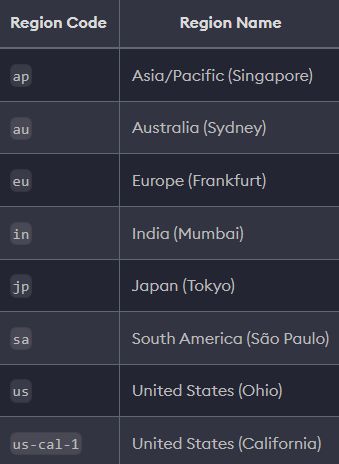

# Creando los archivos del servidor

En el siguiente código crearemos los archivos necesario para que el servidor funcione correctamente.

Es necesario aceptar el EULA de Minecraft para proseguir.

**Descargando el servidor de Minecraft**

En el código de debajo puedes elegir la versión de Minecraft que quieres usar, que software usar (Paper, Forge o Vanilla) y que versiones alternativas.

In [2]:
# @title  { vertical-output: true, display-mode: "form" }
# @markdown Introduce aquí el software que vas a usar ([Forge](https://files.minecraftforge.net/net/minecraftforge/forge/), [Paper](https://papermc.io), etc...)
server_type = 'forge' # @param {type:"string"}
server_type = server_type.lower()

# @markdown Introduce aquí la versión de minecraft que vas a usar
version = "1.20.2" # @param {type:"string"}

# @markdown Introduce aquí la versión de forge (en caso de que uses forge)
forge_version = "48.0.44" # @param {type:"string"}

# @markdown Introduce aquí el nombre de tu carpeta donde está ubicado el servidor
dir_name = 'Mi_MineColab5' # @param {type:"string"}

# Colores para prints
class colors:
    header = '\033[95m'
    okblue = '\033[94m'
    okcyan = '\033[96m'
    okgreen = '\033[92m'
    warning = '\033[93m'
    fail = '\033[91m'
    endc = '\033[0m'
    bold = '\033[1m'
    underline = '\033[4m'

# NO TOQUES NADA DESPUÉS DE ESTE COMENTARIO SI NO SABES LO QUE ESTÁS HACIENDO.
from google.colab import drive
from google.colab import userdata
from IPython.display import clear_output
import requests
import json
import os
import time


drive.mount('/content/drive')

drive_route = '/content/drive/My Drive/' + dir_name + '/'

if not os.path.exists(drive_route):
    os.makedirs(drive_route)
    print(f"Carpeta '{dir_name}' creada en Google Drive.")
else:
    print(f"La carpeta '{dir_name}' ya existe en Google Drive. Accediendo a ella...")
    %cd $drive_route

print(colors.okcyan + 'Se va a descargar e instalar el servidor.')
print(colors.warning + 'Esto puede tardar hasta 10 minutos, así que ten paciencia')
print(colors.endc)

time.sleep(10)

if server_type == "paper":
  a = requests.get("https://papermc.io/api/v2/projects/paper/versions/" + version)
  b = requests.get("https://papermc.io/api/v2/projects/paper/versions/" + version + "/builds/" + str(a.json()["builds"][-1]))
  print("https://papermc.io/api/v2/projects/paper/versions/" + version + "/builds/" + str(a.json()["builds"][-1]) + "/downloads/" + b.json()["downloads"]["application"]["name"])
  url = "https://papermc.io/api/v2/projects/paper/versions/" + version + "/builds/" + str(a.json()["builds"][-1]) + "/downloads/" + b.json()["downloads"]["application"]["name"]

  jar_name = "server.jar"
  time.sleep(5)
  print(colors.fail + 'SOLO SI ES LA PRIMERA VEZ QUE EJECUTAS EL CÓDIGO: Reinicia el entorno (doble click al icono de parar la celda) o espera a que se finalize automaticamente')
  !java -Xmx10G -Xms10G -jar server.jar --installServer

if server_type == "fabric":
  url = "https://maven.fabricmc.net/net/fabricmc/fabric-installer/0.7.4/fabric-installer-0.7.4.jar"
  jar_name = "fabric-installer.jar"
  print(colors.fail + 'SOLO SI ES LA PRIMERA VEZ QUE EJECUTAS EL CÓDIGO: Reinicia el entorno (doble click al icono de parar la celda) o espera a que se finalize automaticamente')
  time.sleep(5)
  !java -Xmx10G -Xms10G -jar fabric-installer.jar server -mcversion $version -downloadMinecraft

if server_type == "forge":
  url = f"https://maven.minecraftforge.net/net/minecraftforge/forge/{version}-{forge_version}/forge-{version}-{forge_version}-installer.jar"
  jar_name = "server.jar"
  print(colors.fail + 'SOLO SI ES LA PRIMERA VEZ QUE EJECUTAS EL CÓDIGO: Reinicia el entorno (doble click al icono de parar la celda) o espera a que se finalize automaticamente')
  time.sleep(5)
  !java -Xmx10G -Xms10G -jar server.jar --installServer

r = requests.get(url)

if r.status_code == 200:
  with open(drive_route + jar_name, 'wb') as f:
    f.write(r.content)
else:
  print(colors.fail + 'Error '+ str(r.status_code) + '! La versión introducida no es correcta o no se puede acceder a ella. Por favor vuelve a intentarlo o prueba con otra versión.')
  print('Si el problema persiste contacta conmigo a través del discord oficial o del canal de YouTube.')

# Saving colab data
colabconfig = {
    "server_type": server_type,
    "minecraft_version": version,
    "forge_version": forge_version
    }
json.dump(colabconfig, open("colabconfig.json",'w'))

clear_output(wait=True)

print(colors.okgreen + 'Terminado con exito!')
print('Puede que tardes unos segundos en ver los cambios')
print()
print(colors.warning + 'Ahora deberás añadir un secreto (icono de la llave, lateral izquierdo) con los datos inferiores.')
print()
print(colors.endc + 'Tus datos son --> Nombre: ' + colors.header + 'ruta_servidor' + colors.endc + ' - Ruta (valor): ' + colors.header + drive_route + colors.endc + ' <--')
print(colors.endc)
print('---')
print(colors.warning + '¡Si es la primera vez que ejecutas el código, vuelve a ejecutarlo otra vez!')


Terminado con exito!
Puede que tardes unos segundos en ver los cambios

Ahora deberás añadir un secreto (icono de la llave, lateral izquierdo) con los datos inferiores.

Tus datos son --> Nombre: ruta_servidor - Ruta (valor): /content/drive/My Drive/Mi_MineColab5/ <--

---
¡Si es la primera vez que ejecutas el código, vuelve a ejecutarlo otra vez!


**Aceptar el EULA de forma automática**

In [ ]:
# @title  { run: "auto", vertical-output: true, display-mode: "form" }
# @markdown ¿Aceptas el EULA de Minecraft? Es necesario para poder ejecutar el servidor.
eula_accept = True # @param {type:"boolean"}

if(eula_accept == True):
  from google.colab import drive
  from google.colab import userdata
  import os
  drive.mount('/content/drive')
  drive_route = userdata.get('ruta_servidor')

  %cd $drive_route
  !echo "eula=true" >> eula.txt

  print('')
  print('')
  print('¡Se ha aceptado el EULA correctamente!')
else:
  print('Debes aceptar el EULA para continuar')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Mi_MineColab4


¡Se ha aceptado el EULA correctamente!


# Debug
Acceso mediante SSh por [colab-ssh](https://github.com/WassimBenzarti/colab-ssh).

<p style="color:red;">ATENCIÓN: PODRÍAS SER BANNEADO</p>

In [ ]:
# @title Tunel SSH en Colab { vertical-output: true, display-mode: "form" }
# @markdown Ejecuta este código para obtener acceso a la consola mediante SSH. Revisa: [Documentación SSH](https://github.com/WassimBenzarti/colab-ssh) para más detalles.

# Instala el ejecutable de colab ssh
!pip install colab_ssh --upgrade

from colab_ssh import launch_ssh_cloudflared, init_git_cloudflared
ssh_tunnel_password = "<INTRODUCE AQUÍ TU CONTRASEÑA SSH>" #@param {type: "string"}
launch_ssh_cloudflared(password=ssh_tunnel_password)

In [ ]:
# Obtén acceso público a través de ngork
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

# Visualizar los archivos dentro de la carpeta

In [ ]:
# @title { run: "auto", vertical-output: true, display-mode: "form" }
# @markdown Activa el visualizador para poder ver los archivos del servidor en texto plano.
# @markdown
# @markdown Esto sirve para comprobar que la dirección es correcta y que los archivos se han instalado correctamente.
visualizer = False # @param {type:"boolean"}

if(visualizer == True):
  from google.colab import userdata
  from google.colab import drive

  drive.mount('/content/drive')
  drive_route = userdata.get('ruta_servidor')

  %cd $drive_route
  !ls
else:
  print('Debes activar el visualizador desde el campo superior (formulario) para poder ver los archivos en forma de texto plano.')


Debes activar el visualizador desde el campo de la derecha (formulario) para poder ver los archivos en forma de texto plano.
